# Credit Default Risk

Este notebook serve para fazer os exercícios do livro Projetos de Ciência de Dados com Python, especificamente do capítulo 2 - Exploração e Limpeza de dados


**O desafio da empresa**

A empresa de cartão de crédito disponibilizou um dataset com dados demográficos e financeiros dos últimos 6 meses de uma amostra de 30.000 titulares de contas. Há uma linha para cada conta e as linhas são rotuladas de acordo com se no mês seguinte ao período de dados histórico de seis meses um proprietário de conta ficou inadimplente, ou seja, não fez o pagamento mínimo

**Objetivo**

Desenvolver um algoritmo que consiga prever se uma conta ficará inadimplente no próximo mês com base no conjunto de dados.


# Dicionário dos Dados



| **Coluna**     | **Descrição**                                                                                                                                       |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| **LIMIT_BAL**  | Montante do crédito concedido (em dólar taiwanês): inclui tanto o crédito individual do consumidor quanto o crédito da sua família (suplementar).     |
| **SEX**        | Gênero (1 = masculino; 2 = feminino). **Nota:** Não usarei os dados de gênero para tomar decisões devido a considerações éticas.                     |
| **EDUCATION**  | Educação (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).                                                                        |
| **MARRIAGE**   | Estado civil (1 = casado; 2 = solteiro; 3 = outros).                                                                                                 |
| **AGE**        | Idade (anos).                                                                                                                                        |
| **PAY_1-PAY_6**| Histórico de pagamento passado. Foram rastreados os registros mensais de pagamento passado (de abril a setembro de 2005) da seguinte forma: <br> PAY_1 = status de pagamento em setembro de 2005; <br> PAY_2 = status de pagamento em agosto de 2005; <br> ...; PAY_6 = status de pagamento em abril de 2005. <br> A escala de medição para o status de pagamento é: <br> -1 = pago pontualmente; 1 = atraso de pagamento por um mês; <br> 2 = atraso de pagamento por dois meses; ...; <br> 8 = atraso de pagamento por oito meses; 9 = atraso de pagamento por nove meses ou mais. |
| **BILL_AMT1-BILL_AMT6** | Valor da fatura (em dólar taiwanês). <br> BILL_AMT1 representa o valor da fatura em setembro; <br> BILL_AMT2 representa o valor da fatura em agosto; <br> e assim por diante até BILL_AMT7, que representa o valor pago em abril. |
| **Explicações adicionais das colunas feitas pelo sócio da empresa** | -2: Significa que começou o mês sem valor a ser pago e o crédito não foi usado. <br> -1: Significa que usou um valor que foi totalmente pago. <br> 0: Significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago. |

# 0.0 IMPORTS

In [ ]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options.
pd.set_option('display.max_columns', None)


## 0.1 Loading data

In [ ]:
df = pd.read_csv('chapter_1_cleaned_data.csv')

## Examinando a variável de resposta e concluindo a exploração inicial

No dataset, a variável resposta ou targer 'default payment next month' pode ter apenas 2 valores, 0 ou 1. As contas com valor 1 pertencem à classe positiva, ou seja, ficarão inadimplentes e as contas com valor 0 pertencem à classe negativa, não ficarão inadimplentes.

Por se tratar de um problema de classificação binária, a primeira informação que devemos descobrir é **qual é a proporção da classe positiva?**

In [ ]:
df['default payment next month'].mean()

0.2217971797179718

Percentual de contas que ficaram inadimplentes: **22%**

In [ ]:
df.groupby( 'default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

## Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
my_lr = LogisticRegression()

In [ ]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr

LogisticRegression(C=0.1, solver='liblinear')

### Post Medium

In [ ]:
# Selecionando as 10 primeiras linhas de Education
X = df['EDUCATION'][0:10].values.reshape(-1,1)

In [ ]:
# Selecionando as 10 primeiras linhas da variável target ( inadimplência )
y = df['default payment next month'][0:10].values

In [ ]:
# Treinando um simples modelo apenas como exemplo
my_lr.fit( X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
# Selecionando as linhas de 10:20 ( O modelo ainda não viu esses dados )
dados_treino = df['EDUCATION'][10:20].values.reshape(-1,1)

In [ ]:
previsao_do_modelo = my_lr.predict( dados_treino )
valores_reais = df['default payment next month'][10:20].values

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(valores_reais, previsao_do_modelo)
acuracia = acuracia * 100
acuracia

print(f'Acurácia: {acuracia:.2f}%')

Acurácia: 80.00%


In [ ]:
# Previsão do modelo
my_lr.predict( dados_treino )

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Dados reais ( gabarito )
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [ ]:
y = df['default payment next month'][0:10].values

In [ ]:
my_lr.fit( X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [ ]:
a = my_lr.predict( new_X )
y_true = df['default payment next month'][10:20].values

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_true, a)
acuracia = acuracia * 100
acuracia

print(f'Acurácia: {acuracia:.2f}%')

Acurácia: 80.00%


In [ ]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

## Gerando dados sintéticos

In [ ]:
np.random.seed( seed=1 )
X = np.random.uniform( low=0.0, high=10.0, size=(1000, ) )
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [ ]:
# y = ax + b + N( μ,σ ) Equação linear com ruído gaussiano
np.random.seed( seed=1 )
slope = 0.25
intercept = -1.25

y = slope * X + np.random.normal( loc=0.0, scale=1.0, size=(1000,)) + intercept

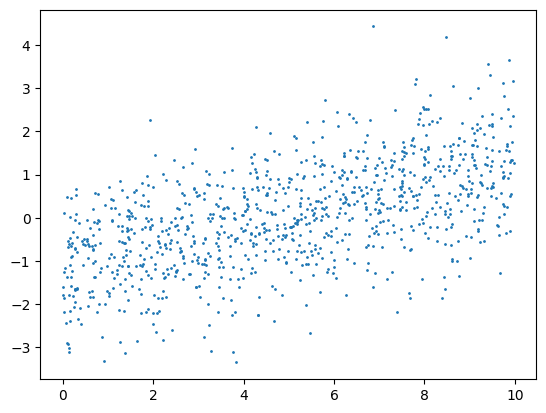

In [ ]:
plt.scatter( X, y, s=1)

## Exercício 08: Regressão linear com scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [ ]:
lin_reg.fit( X.reshape(-1, 1), y)
print( lin_reg.intercept_ )
print( lin_reg.coef_ )

-1.1612566002825888
[0.24002588]


In [ ]:
y_pred = lin_reg.predict( X.reshape(-1,1))

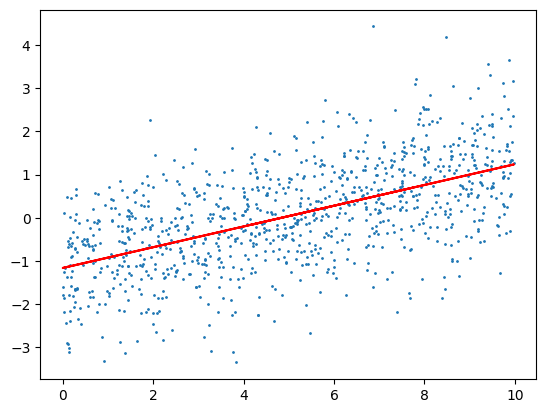

In [ ]:
plt.scatter( X,y,s=1 )
plt.plot( X,y_pred, 'r')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [ ]:
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [ ]:
np.mean( y_train )

0.223102526838873

In [ ]:
np.mean( y_test )

0.21657603600225014

In [ ]:
example_lr = LogisticRegression()

In [ ]:
example_lr.fit( X_train, y_train )

LogisticRegression()

In [ ]:
y_pred = example_lr.predict( X_test )

In [ ]:
# Acurácia utilizando máscara lógica
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

## Exercício 9: Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em Pythn

In [ ]:
# Calculando o número de amostras positivas
P = sum(y_test)
P

1155

In [ ]:
# Calculando verdadeiros positivos ( True Positive )
TP = sum( (y_test == 1) & ( y_pred == 1) )
TP

0

In [13]:
# Calculando a Taxa de verdadeiros positivos ( Recall ou Sensibilidade )
TPR = TP / P
TPR

0.7241379310344828

In [ ]:
# Calculando falsos negativos
FN = sum( (y_test == 1) & ( y_pred == 0))
FN

1155

In [ ]:
# Calculando a taxa de falsos negativos
FNR = FN/P
FNR
# TPR + FNR = 1

1.0

In [ ]:
N = sum( y_test == 0)
N

4178

In [ ]:
TN = sum( (y_test == 0) & (y_pred==0) )
TN

4178

In [ ]:
FP = sum( (y_test == 0) & (y_pred==1) )
FP

0

In [ ]:
TNR = TN/N
FPR = FP/N
print( 'The true negative rate is {} and the false positive rate is {}'.format( TNR, FPR) )

The true negative rate is 1.0 and the false positive rate is 0.0


In [ ]:
from sklearn import metrics
metrics.confusion_matrix( y_test, y_pred )

array([[4178,    0],
       [1155,    0]])

## Exercício 10: Obtendo probabilidades previstas a partir de um modelo de regressão logística

In [ ]:
y_pred_proba = example_lr.predict_proba( X_test )
y_pred_proba

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

In [ ]:
prob_primeira_coluna = np.sum( y_pred_proba,1)
prob_primeira_coluna

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
prob_primeira_coluna.shape

(5333,)

In [ ]:
np.unique( prob_primeira_coluna )

array([1.])

In [ ]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

Text(0, 0.5, 'Number of sampels')

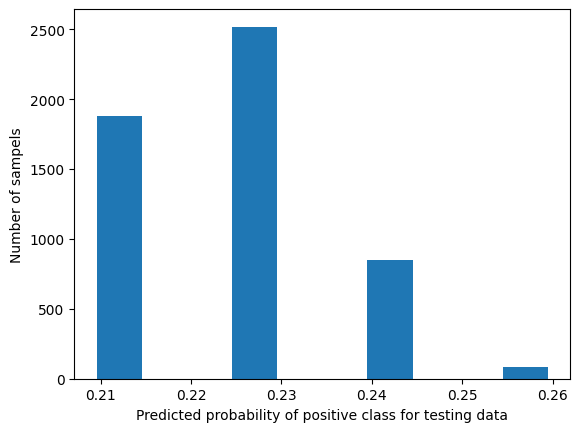

In [ ]:
plt.hist( pos_proba )
plt.xlabel( 'Predicted probability of positive class for testing data')
plt.ylabel( 'Number of sampels')

In [ ]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

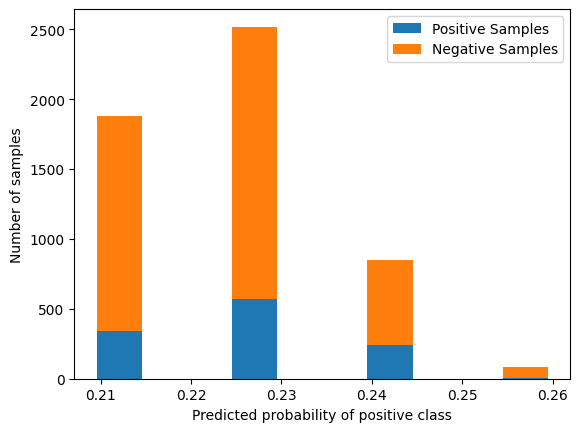

In [ ]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pos_proba )

### Curva ROC da regressão logistica, com uma linha de chance aleatória como comparação

Text(0.5, 1.0, 'ROC curve')

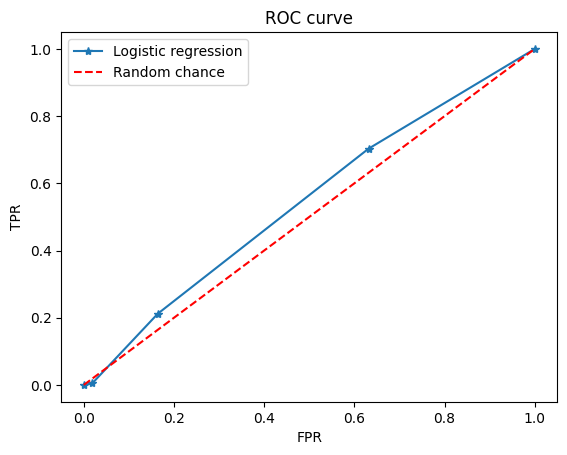

In [ ]:
# Plotando a curva ROC
plt.plot( fpr, tpr, '*-')
plt.plot( [0, 1], [0, 1], 'r--')
plt.legend( ['Logistic regression', 'Random chance'])
plt.xlabel( 'FPR' )
plt.ylabel( 'TPR' )
plt.title( 'ROC curve' )

In [ ]:
# Limites da curva ROC
thresholds

array([       inf, 0.25948347, 0.24203246, 0.22539786, 0.20959039])

### Calculando a área sob a curva ROC ( ROC AUC )


In [ ]:
metrics.roc_auc_score( y_test, pos_proba )
# Como se aproxima de 0,5 significa que parece uma escolha aleatória

0.5434650477972642

### Precisão

In [ ]:
# Precisão = TP / TP + FP
# Se houver muito poucas amostras positivas, a precisão fornecerá
# uma avaliação mais crítica da qualidade de um classificador do que a ROC AUC.

In [ ]:
metrics.precision_recall_curve

<function sklearn.metrics._ranking.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)>

# Atividade 2: Executando a regressão logística com uma nova característica e criando uma curva precision-recall

In [ ]:
# 1
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size = 0.2, random_state=24 )

In [ ]:
# 2
model = LogisticRegression()
# training
model.fit( X_train_2, y_train_2 )
# predict
yhat_pred = model.predict( X_test_2 )

In [ ]:
# 3
y_test_2_pred_proba = model.predict_proba(X_test_2)

In [ ]:
# 4

metrics.roc_auc_score( y_test_2, y_test_2_pred_proba[:, 1])



0.6201990844642832

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

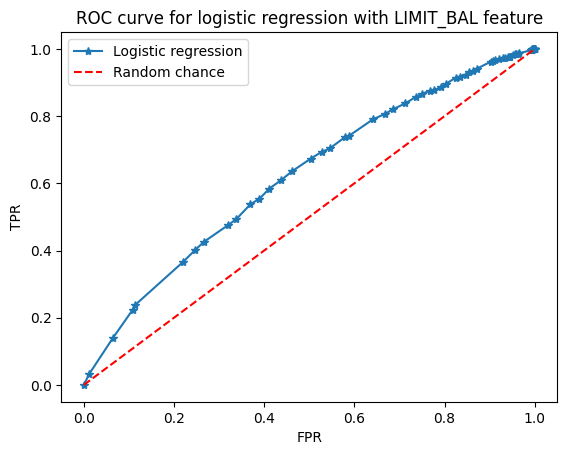

In [ ]:
# 5
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve( y_test_2, y_test_2_pred_proba[:,1] )
plt.plot( fpr_2, tpr_2, '*-')
plt.plot( [0,1], [0,1], 'r--')
plt.legend( ['Logistic regression', 'Random chance'])
plt.xlabel( 'FPR' )
plt.ylabel( 'TPR' )
plt.title( 'ROC curve for logistic regression with LIMIT_BAL feature' )

In [ ]:
# 6
precision, recall, thresh_3 = metrics.precision_recall_curve( y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

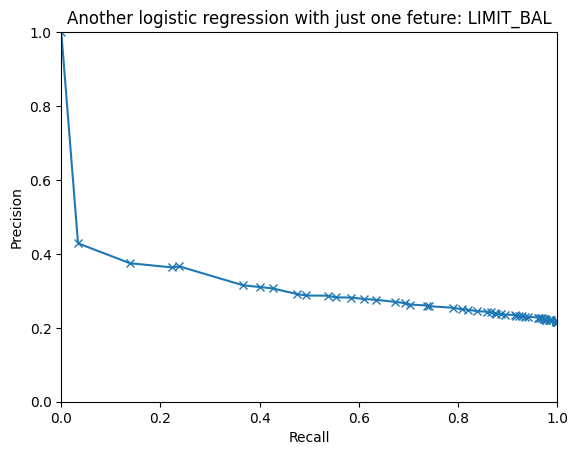

In [ ]:
# 7 - Plotando a curva Precision-Recall
plt.plot( recall, precision, '-x')
plt.xlabel( 'Recall')
plt.ylabel( 'Precision')
plt.title( 'Another logistic regression with just one feture: LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
# 8
metrics.auc(recall, precision)

0.31566964427378624